<a href="https://colab.research.google.com/github/Muriloozol/student_tests_data_analysis/blob/master/Elementos_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elementos de Máquina
Professor: 
- Rodrigo de Souza Vieira, email: rodrigo.vieira@ufsc.br

Alunos:
- Thiago Pessoa
- Murilo Ozol

Outras informações
- [Ementa](https://moodle.ufsc.br/pluginfile.php/3279712/mod_resource/content/9/programa.pdf)


## Descrição do Trabalho
Nesta disciplina é proposto a realização de um Projeto de redutor como forma de aplicar as metodologias de ensino *learning by doing* e *flip class*. O projeto será dividido em etapas bem definidas de acordo com os elementos de máquina a serem abordados. A seguinte sequência será seguida:

1. Projeto dos pares de engrenagens
2. Definição da correia ou corrente no eixo de saída do redutor
  1. Distância entre centros de 480 mm
  2. Relação de desmultiplicação de 1:3,2
3. Projeto dos eixos
4. Projeto da Ligação cubo eixo entre as peças




### Motivação para utilização do google colab

In [0]:
import numpy as np
import pandas as pd
import regex as re
import json
import matplotlib.pyplot as plt

### Projeto sorteado
1º Projeto

Redutor de dois estágios

- Rotação na entrada: 1750 rpm
- Rotação de saída: 110 rpm
- Distância entre centros 238 mm
- Potência do motor 45 CV

**Primeiros Cálculos**

In [0]:
rpm_in = 1750 # rpm
rpm_out = 110 # rpm
a = 238 # mm (distância entre centros)
pot_engine = 45 # CV
pot_engine = pot_engine * 745.7 # W

# Relação de transmissão total
i_t = rpm_in/rpm_out

i_t_error = np.abs(-i_t*0.01)

# Torque
T = (pot_engine * 30000 * 0.101972)/(np.pi*rpm_in) # kgfmm

print('A relação de transmissão total é {}'.format(np.round(i_t, 2)))
print('O torque na entrada é {} kgfmm'.format(np.round(T,2)))

A relação de transmissão total é 15.91
O torque na entrada é 18672.0 kgfmm


## Recomendações de Projeto

#### **Recomendação de relação de transmissão**

>$i_1=0,71i_t^{0.7}$

>$i_t = i_1*i_2$

In [0]:
# Relações de transmissão para os dois estágios
i_1 = 0.71*i_t**0.7 
i_2 = i_t/i_1

print('A relação de transmissão do primeiro par é: {}'.format(np.round(i_1,2)))
print('A relação de transmissão do segundo par é: {}'.format(np.round(i_2,2)))

A relação de transmissão do primeiro par é: 4.93
A relação de transmissão do segundo par é: 3.23


#### **Pré-dimensionamento baseado no colapso por fadiga superficial**
>$d_1'= sqrt[3]{4T_1(i+1)\over iy_M\Psi_d}$

Onde,

- $d_1'$ -> o diâmetro primitivo do pinhão em $mm$
- $T_1$  -> torque de entrada em $kgfmm$
- $y_M$  -> fator MAAG (dado na tabela 10.3 em $kgf/mm^2$
- $i$    -> Relação de transmissão
- $\Psi_d$ -> Relação entre largura e diâmetro

> $\Psi_d = \frac{b}{d}$

O Módulo pode ser calculado por
> $m = \frac{d_1'}{Z_1}$

Onde,
- $Z_1$ -> Numero de dentes 

**Parâmetros**

Valores iniciais tirados de tabelas propostas pela literatura

In [0]:
y_m = 0.8
Psi_d_1 = 0.5
Psi_d_2 = 0.5 

**Primeiro par**

In [0]:
# Apply the equation for the first pair
d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
d2_1 = i_1*d1_1

print('Diâmetro do pinhão do primeiro par: {}mm'.format(np.round(d1_1,2)))
print('Diâmetro da coroa do primeiro par: {}mm'.format(np.round(d2_1,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_1+d2_1)/2, 2)))

Diâmetro do pinhão do primeiro par: 60.79mm
Diâmetro da coroa do primeiro par: 299.39mm
A distância entre centros é: 180.09mm


**Segundo par**

In [0]:
# Apply the equation for the second pair
d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
d2_2 = i_2*d1_2

print('Diâmetro do pinhão do segundo par: {}mm'.format(np.round(d1_2,2)))
print('Diâmetro da coroa do segundo par: {}mm'.format(np.round(d2_2,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_2+d2_2)/2, 2)))

Diâmetro do pinhão do segundo par: 62.53mm
Diâmetro da coroa do segundo par: 202.0mm
A distância entre centros é: 132.26mm


####**Otimizando o parâmetro $\Psi_d$**

In [0]:
def calculate_a_error(i_1, i_2, Psi_d_1, Psi_d_2, y_m=0.8, a=238):
    """
    Calculate the `a` error given the parameters to apply on the recomendation
    equation.

    Parameters
    ----------
        i_1: float
            first pair gear ratio
        
        i_2: float
            second pair gear ratio
        
        Psi_d_1: float
            Relation between width and diameter
        
        Psi_d_2: float
            Relation between width and diameter
        
        y_m: float, default=0.8
            Maag factor
        
        a: float or int
            Desired distance between axis

    Returns
    -------
        error: float
            Sum of `error_1` and `error_2`
        
        error_1: float
            Calculated a and `a` desired difference 
        
        error_2: float
            Calculated a and `a` desired difference 
    """
    # Apply the recomendation equation
    d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
    d2_1 = i_1*d1_1

    d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
    d2_2 = i_2*d1_2

    # Calculated distance between axis
    a_1 = np.round((d1_1+d2_1)/2, 2)
    a_2 = np.round((d1_2+d2_2)/2, 2)
    
    # Error from both axis
    error_1 = a - a_1
    error_2 = a - a_2
    
    # Total error
    error = np.abs(error_1) + np.abs(error_2)
    
    return error, error_1, error_2

# Dict to hold the results
result = {'y_m':y_m, 
          'Psi_d_1': np.infty,
          'Psi_d_2': np.infty,
          'error': np.infty, 
          'error_1': np.infty,
          'error_2': np.infty}

# Lists to compute the errors
error_list = []
error_1_list = []
error_2_list = []

# Iteration over the Psi_d_1 for the first pair
for Psi_d_1_ in np.linspace(0.1, 1.2, 50):
    # Iteration over the Psi_d_1 for the second pair
    for Psi_d_2_ in np.linspace(0.01, 1.2, 50):   
        # Calculate the errors
        error, error_1, error_2 = calculate_a_error(i_1=i_1, i_2=i_2,
                                                    Psi_d_1=Psi_d_1_,
                                                    Psi_d_2=Psi_d_2_)
        
        # Verify if the error is smaller than the last computed
        if error < result['error']:
            # Compute the results
            result.update({'y_m':y_m, 
                           'Psi_d_1': Psi_d_1_, 
                           'Psi_d_2': Psi_d_2_, 
                           'error': error,
                           'error_1': error_1, 
                           'error_2': error_2})
            
            # Compute the errors
            error_list.append(error)
            error_1_list.append(error_1)
            error_2_list.append(error_2)

            # Override the last Psi_d
            Psi_d_1 = Psi_d_1_
            Psi_d_2 = Psi_d_2_

result

{'Psi_d_1': 0.21224489795918366,
 'Psi_d_2': 0.08285714285714285,
 'error': 4.420000000000016,
 'error_1': -1.6200000000000045,
 'error_2': -2.8000000000000114,
 'y_m': 0.8}

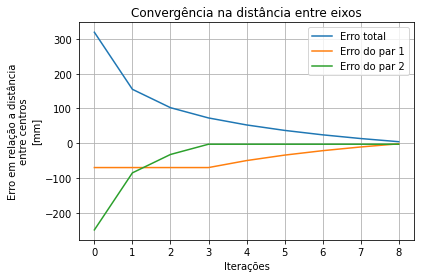

In [0]:
plt.title('Convergência na distância entre eixos')
plt.plot(error_list, label='Erro total')
plt.plot(error_1_list, label='Erro do par 1')
plt.plot(error_2_list, label='Erro do par 2')
plt.xlabel('Iterações')
plt.ylabel('Erro em relação a distância\n entre centros \n[mm]')
plt.legend()
plt.grid()
plt.show()

Reaplicando a equação de pré-dimensionamento utilizando os valores de $\Psi_d$ otimizados.

**Primeiro par**

In [0]:
d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
d2_1 = i_1*d1_1

print('Diâmetro do pinhão do primeiro par: {}mm'.format(np.round(d1_1,2)))
print('Diâmetro da coroa do primeiro par: {}mm'.format(np.round(d2_1,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_1+d2_1)/2, 2)))

Diâmetro do pinhão do primeiro par: 80.89mm
Diâmetro da coroa do primeiro par: 398.36mm
A distância entre centros é: 239.62mm


**Segundo par**

In [0]:
d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
d2_2 = i_2*d1_2

print('Diâmetro do pinhão do segundo par: {}mm'.format(np.round(d1_2,2)))
print('Diâmetro da coroa do segundo par: {}mm'.format(np.round(d2_2,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_2+d2_2)/2, 2)))

Diâmetro do pinhão do segundo par: 113.85mm
Diâmetro da coroa do segundo par: 367.75mm
A distância entre centros é: 240.8mm


#### **Definindo o número mínimo de dentes**

Para não haver recorte, o número mínimo de dentes é dado por:
>$Z_{min} = {2K\over \sin^2\alpha}$

onde,
- $K=1+c$ 
- $c$ é o fator de folga de fundo e $c_{padrão}=0.25$ 

$\alpha$ é o ângulo de pressão e pode assumir os seguintes valores:
- $14.5^o$
- $20^o$ -> Mais utilizado
- $25^o$

In [0]:
c = 0.25
alpha = np.pi/9

Z_min = 2*(1+c)/(np.sin(alpha)**2)
Z_min = np.ceil(Z_min)

print(Z_min)

22.0


#### **Definição do módulo**

Considerando que nosso par de engrenagens é de uso geral, usaremos um módulo padronizado de classe I. O seguinte conjunto apresenta os módulos de classe I padronizados pela norma ABNT PB-90
> $	\left \{ 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 20,25,32,40,50 \right \}$

De acordo com a definição de módulo $m = {d_1'\over Z_1}$ podemos encontrar uma estimativa utilizando o valor do diâmetro apresentado anteriormente e o número mínimo de dentes. 


In [0]:
m_list = [0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5,
          3, 4, 5, 6, 8, 10, 12, 20, 25, 32, 40, 50]

m = d1_1/Z_min

print('A primeira estimativa de módulo utilizando o número mínimo de \
dentes foi: {}mm'.format(np.round(m, 2)))

A primeira estimativa de módulo utilizando o número mínimo de dentes foi: 3.68mm


Verifica-se o número de dentes de todas as engrenagens utilizando o módulo padronizado mais próximo do valor encontrado.

In [0]:
def verify_rounded_m(m, d1_1, d2_1, d1_2, d2_2):
    """
    With the given diameteres and modulus, calculate the number of teeth,
    the gear ratio for the pairs and the total.

    Parameters
    ----------
    m: `int` or `float`
        modulus to verify

    d1_1: `float`
        First gear of first pair diameter

    d2_1: `float`
        Second gear of first pair diameter

    d1_2: `float`
        First gear of second pair diameter

    d2_2: `float`
        Second gear of second pair diameter

    Returns
    -------
    Dict
        Dictionary with `modulo`, `Z1_1`, `Z2_1`, `Z1_2`, `Z2_2`, `i_1`, `i_2`
        and `i_t` data
    """
    m=m

    # Calculate the number of teeth
    Z1_1 = np.round(d1_1/m)
    Z2_1 = np.round(d2_1/m)
    Z1_2 = np.round(d1_2/m)
    Z2_2 = np.round(d2_2/m)

    # Calculate the gear ratio
    i_1 = Z2_1/Z1_1
    i_2 = Z2_2/Z1_2
    i_t = i_1 * i_2


    return {'modulo': m, 
            'Z1_1':Z1_1,
            'Z2_1':Z2_1, 
            'Z1_2':Z1_2,
            'Z2_2':Z2_2,
            'i_1':i_1, 
            'i_2':i_2,
            'i_t':i_t}


verified = verify_rounded_m(m=np.round(m), d1_1=d1_1, d2_1=d2_1, d1_2=d1_2, d2_2=d2_2)

print('O módulo padronizado: {}mm \n'.format(verified['modulo']))

print('Número de dentes do pinhão da engrenagem do primeiro par: \t{}'\
    .format(verified['Z1_1']))
print('Número de dentes da coroa da engrenagem do primeiro par: \t{}'\
    .format(verified['Z2_1']))
print('Número de dentes do pinhão da engrenagem do segundo par: \t{}'\
    .format(verified['Z1_2']))
print('Número de dentes da coroa da engrenagem do segundo par: \t{}\n'\
    .format(verified['Z2_2']))

print('Nova relação de transmissão do par 1: \t{}'.format(verified['i_1']))
print('Nova relação de transmissão do par 2: \t{}'.format(verified['i_2']))
print('Nova relação de transmissão total: \t{}\n'.format(verified['i_t']))

O módulo padronizado: 4.0mm 

Número de dentes do pinhão da engrenagem do primeiro par: 	20.0
Número de dentes da coroa da engrenagem do primeiro par: 	100.0
Número de dentes do pinhão da engrenagem do segundo par: 	28.0
Número de dentes da coroa da engrenagem do segundo par: 	92.0

Nova relação de transmissão do par 1: 	5.0
Nova relação de transmissão do par 2: 	3.2857142857142856
Nova relação de transmissão total: 	16.428571428571427



Tendo em vista o número excessivo de dentes nas coroas, testaremos outros módulos.

In [0]:
# DataFrame to hold results
modulus_df = pd.DataFrame(columns=['modulo',
                                   'Z1_1', 'Z2_1', 
                                   'Z1_2', 'Z2_2', 
                                   'i_1', 'i_2', 'i_t'])

# Iterate over standard modulus
for i in m_list:
    r = verify_rounded_m(m=i, d1_1=d1_1, d2_1=d2_1, d1_2=d1_2, d2_2=d2_2)
    modulus_df = modulus_df.append(r, ignore_index=True)

modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630
8,2.00,40.0,199.0,57.0,184.0,4.975000,3.228070,16.059649
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397


Podemos agora, verificar qual destas opções possui o menor desvio na relação de transmissão total.

In [0]:
modulus_df['Erro [%]'] = np.abs((modulus_df['i_t']-i_t)/i_t)*100
modulus_df.sort_values('Erro [%]')

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%]
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564,0.009259
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323,0.061401
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308,0.174634
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630,0.185185
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397,0.192935
10,3.00,27.0,133.0,38.0,123.0,4.925926,3.236842,15.944444,0.222222
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694,0.253924
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382,0.299886
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621,0.336095
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668,0.399625


O próximo requisito a ser verificado é o número de dentes total.

In [0]:
modulus_df['Soma de dentes'] = modulus_df.loc[:,'Z1_1':'Z2_2'].sum(axis=1)
modulus_df.sort_values('Soma de dentes', ascending=False)

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564,0.009259,3203.0
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323,0.061401,2402.0
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308,0.174634,1923.0
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694,0.253924,1602.0
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668,0.399625,1201.0
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382,0.299886,961.0
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621,0.336095,769.0
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630,0.185185,641.0
8,2.00,40.0,199.0,57.0,184.0,4.975000,3.228070,16.059649,0.946366,480.0
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397,0.192935,384.0


Tendo em vista que algumas opções apresentam número excessivo de dentes e outras um número extremamente reduzido, eliminaremos as opções cuja soma de dentes seja maior que $250$ e qualquer opção que apresente alguma engrenagem com número de dentes inferior a $4$.

In [0]:
modulus_df = modulus_df[modulus_df['Soma de dentes']<250]
modulus_df = modulus_df[modulus_df['Z1_1']>4] 
modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes
11,4.0,20.0,100.0,28.0,92.0,5.000000,3.285714,16.428571,3.265306,240.0
12,5.0,16.0,80.0,23.0,74.0,5.000000,3.217391,16.086957,1.118012,193.0
13,6.0,13.0,66.0,19.0,61.0,5.076923,3.210526,16.299595,2.454598,159.0
14,8.0,10.0,50.0,14.0,46.0,5.000000,3.285714,16.428571,3.265306,120.0
15,10.0,8.0,40.0,11.0,37.0,5.000000,3.363636,16.818182,5.714286,96.0
16,12.0,7.0,33.0,9.0,31.0,4.714286,3.444444,16.238095,2.068027,80.0


Tendo em vista que o erro percentual é $>1\%$ em todas as opções restantes, tentaremos ajustar o número de dentes, mantendo os módulos padronizados, de forma que o erro seja menor que o aceitável.

In [0]:
d1_1_ = modulus_df['modulo'] * modulus_df['Z1_1']
d2_1_ = modulus_df['modulo'] * modulus_df['Z2_1']
d1_2_ = modulus_df['modulo'] * modulus_df['Z1_2']
d2_2_ = modulus_df['modulo'] * modulus_df['Z2_2']

a_1_ = (d1_1_ + d2_1_)/2
a_2_ = (d1_2_ + d2_2_)/2

modulus_df['a_1'] = a_1_
modulus_df['a_2'] = a_2_
modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes,a_1,a_2
11,4.0,20.0,100.0,28.0,92.0,5.000000,3.285714,16.428571,3.265306,240.0,240.0,240.0
12,5.0,16.0,80.0,23.0,74.0,5.000000,3.217391,16.086957,1.118012,193.0,240.0,242.5
13,6.0,13.0,66.0,19.0,61.0,5.076923,3.210526,16.299595,2.454598,159.0,237.0,240.0
14,8.0,10.0,50.0,14.0,46.0,5.000000,3.285714,16.428571,3.265306,120.0,240.0,240.0
15,10.0,8.0,40.0,11.0,37.0,5.000000,3.363636,16.818182,5.714286,96.0,240.0,240.0
16,12.0,7.0,33.0,9.0,31.0,4.714286,3.444444,16.238095,2.068027,80.0,240.0,240.0


In [0]:
opt_df = pd.DataFrame(columns=['modulo',
                               'Z1_1', 'Z2_1', 
                               'Z1_2', 'Z2_2',
                               'd1_1', 'd2_1',
                               'd1_2', 'd2_2', 
                               'i_1', 'i_2', 'i_t',
                               'Erro [%]', 'Soma de dentes',
                               'a_1', 'a_2'])

for m_ in modulus_df['modulo']:
    for i in range(15,30):                 # Z1_1
        for j in range(30,105):            # Z2_1
            for k in range(15,30):         # Z1_2
                for l in range(30,120):    # Z2_2
                    Z_sum_ = i+j+k+l 
                    if Z_sum_ < 250:
                        
                        d1_1_ = i * m_
                        d2_1_ = j * m_
                        d1_2_ = k * m_
                        d2_2_ = l * m_

                        a_1_ = (d1_1_ + d2_1_)/2
                        a_2_ = (d1_2_ + d2_2_)/2

                        if np.abs(a_1_-a)<5 and np.abs(a_2_-a)<5:
                            
                            i_t_ = j/i * l/k
                            error_ = np.abs((i_t-i_t_)*100/i_t)
                            
                            if error_<1:
                            
                                r = {'modulo':m_,
                                     'Z1_1':i,
                                     'Z2_1':j, 
                                     'Z1_2':k,
                                     'Z2_2':l,
                                     'd1_1':d1_1_, 
                                     'd2_1':d2_1_,
                                     'd1_2':d1_2_,
                                     'd2_2':d2_2_,
                                     'i_1':j/i,
                                     'i_2':l/k, 
                                     'i_t':i_t_,
                                     'Erro [%]':error_,
                                     'Soma de dentes':Z_sum_,
                                     'a_1':a_1_,
                                     'a_2':a_2_}
                                     
                                opt_df = opt_df.append(r, ignore_index=True)

In [0]:
opt_df.sort_values('Erro [%]').head(15)

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,d1_1,d2_1,d1_2,d2_2,i_1,i_2,i_t,Erro [%],Soma de dentes,a_1,a_2
17,4.0,21.0,97.0,27.0,93.0,84.0,388.0,108.0,372.0,4.619048,3.444444,15.910053,0.006047,238.0,236.0,240.0
81,4.0,27.0,93.0,21.0,97.0,108.0,372.0,84.0,388.0,3.444444,4.619048,15.910053,0.006047,238.0,240.0,236.0
9,4.0,20.0,99.0,28.0,90.0,80.0,396.0,112.0,360.0,4.950000,3.214286,15.910714,0.010204,237.0,238.0,236.0
86,4.0,28.0,90.0,20.0,99.0,112.0,360.0,80.0,396.0,3.214286,4.950000,15.910714,0.010204,237.0,236.0,238.0
16,4.0,21.0,96.0,27.0,94.0,84.0,384.0,108.0,376.0,4.571429,3.481481,15.915344,0.039305,238.0,234.0,242.0
82,4.0,27.0,94.0,21.0,96.0,108.0,376.0,84.0,384.0,3.481481,4.571429,15.915344,0.039305,238.0,242.0,234.0
18,4.0,21.0,98.0,27.0,92.0,84.0,392.0,108.0,368.0,4.666667,3.407407,15.901235,0.049383,238.0,238.0,238.0
79,4.0,27.0,92.0,21.0,98.0,108.0,368.0,84.0,392.0,3.407407,4.666667,15.901235,0.049383,238.0,238.0,238.0
35,4.0,22.0,99.0,26.0,92.0,88.0,396.0,104.0,368.0,4.500000,3.538462,15.923077,0.087912,239.0,242.0,236.0
69,4.0,26.0,92.0,22.0,99.0,104.0,368.0,88.0,396.0,3.538462,4.500000,15.923077,0.087912,239.0,236.0,242.0


In [0]:
best_pair = opt_df.iloc[18]
best_pair

modulo              4.000000
Z1_1               21.000000
Z2_1               98.000000
Z1_2               27.000000
Z2_2               92.000000
d1_1               84.000000
d2_1              392.000000
d1_2              108.000000
d2_2              368.000000
i_1                 4.666667
i_2                 3.407407
i_t                15.901235
Erro [%]            0.049383
Soma de dentes    238.000000
a_1               238.000000
a_2               238.000000
Name: 18, dtype: float64

#### Deslocamento de perfil
**Engrenamento em Vê Zero**

$v = h_{ac} - r sin²\alpha$

$h_{ac} = K*m$

$x_{min} = K - {Z\over2}sin²\alpha$

In [0]:
K = 1 + c
h_ac = K * best_pair['modulo']
v = h_ac - (best_pair['d1_1']/2)*np.sin(alpha)**2
x_min = K - (best_pair['Z1_1']*np.sin(alpha)**2)/2

print('Altura de adendo:\t\t{}'.format(h_ac))
print('Deslocamento v: \t\t{}'.format(v))
print('Fator mínimo de deslocamento:\t{}'.format(x_min))

Altura de adendo:		5.0
Deslocamento v: 		0.0869333054985395
Fator mínimo de deslocamento:	0.021733326374634876


Para viabilizar a fabricação escolhe-se um deslocamento v maior do que o obtido. Como esse valor pode ser arbitrário, escolhe-se um deslocamento de $0.2mm$. Como consequência, temos que o novo $x$ é $0.05$ como definido abaixo:

In [0]:
x = 0.2/best_pair['modulo']
print('Novo fator de deslocamento: {}'.format(x))

Novo fator de deslocamento: 0.05


**Novas alturas de adendo e dedendo**

$h_{a1} = (1 + x_1)*m$

$h_{a2} = (1 + x_2)*m$

$h_{f1} = (1 + c - x_1)*m$

$h_{f2} = (1 + c - x_2)*m$

## Parte mecânica

Os cálculos apresentados a seguir baseiam-se na falha por flexão no dente. O Método utilizado será o **ISO 6336-3** de 2006.

Tensão máxima de flexão no pé do dente o valor:

> $\sigma_F = \sigma_{F0} K_A K_v K_{F\beta} K_{F\alpha} $

Sendo: 

* **$\sigma_F$** o valor admissível para tensão de flexão no pé do dente. 

* **$K_A$** O fator de aplicação.

* **$K_v$** O fator interno dinâmico (definido pela ISO 6336-1), é função dos efeitos do grau de precisão do dente em relação a velocidade e carga, sendo portanto influenciado pelo projeto e pela fabricação. A determinação do seu valor é mostrado no na seção sobre tensão superficial.

* **$K_{F\beta}$**  é o fator de carga na face, que considera a não uniformidade da superfície do dente (definido pela ISO 6336-1) e demonstrado na seção H.5.

* **$K_{F\alpha}$** é o fator de carga transversal na face, similar ao KF β mas na direção transversal para engrenagens helicoidais (definido também pela ISO 6336-1).

* **$\sigma_{F0}$** a tensão de flexão no pé do dente para um torque estático nominal, admitindo um contato livre de erros entre os dentes do par de engrenagens, pode ser calculado da seguinte forma:


> $\sigma_{F0} = {F_t\over b m_n} Y_F Y_S Y_\beta Y_B Y_{DT}$

Onde,

* $F_t$ carga tangente nominal, que produz efetivamente o torque

* $b$ a largura da engrenagem 

* $m_n$ o módulo na direção normal 

* $Y_F$ o fator de forma

* $Y_S$ o fator de correção de tensão

* $Y_β$ o fator de ângulo de hélice

* $Y_B$ o fator de espessura do aro 

* $Y_{DT}$ o fator de profundidade do dente

In [0]:
x1, x2 = x, -x

# Altura de adendo
h_a1 = (1 + x1) * best_pair['modulo']
h_a2 = (1 + x2) * best_pair['modulo']

# Altura de dedendo
h_f1 = (1 + c - x1) * best_pair['modulo']
h_f2 = (1 + c - x2) * best_pair['modulo']

print('Altura do Adendo: {}'.format(h_a1))


Altura do Adendo: 4.2


---------------------
**T.H.E E.N.D**



Na próxima célula é definida uma função que recebe o diametro do pinhão e coroa de dois pares de engrenagens. Também recebe qual a relação de transmissão que se deseja atingir.

A função calcula o numero de dentes de cada engrenagem para todos os módulos padronizados de classe I.

Depois de calcular os numeros de dentes a função arredonda os valores obtidos e calcula a relação de transmissão, depois disso a função compara com a relação de transimissão que se deseja atingir e salva os resultados obtidos.

A função retorna uma tabela (DataFrame)com todos os resultados obtidos


In [0]:
def iterate_diameters(d1_1, d2_1, d1_2, d2_2, i_t):

    # Module class I (for general purpouse)
    m = [0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5,
         3, 4, 5, 6, 8, 10, 12, 20, 25, 32, 40, 50]

    # Create a DataFrame to hold the results
    df = pd.DataFrame(columns=['modulo', 'Z_pinhao_1','Z_coroa_1',
                                         'Z_pinhao_2', 'Z_coroa_2'])
    # Itereate over the modulus
    for m in m:
        # Compute the gear teeth for the given diameters
        z1_1 = d1_1/m
        z2_1 = d2_1/m
        z1_2 = d1_2/m
        z2_2 = d2_2/m

        df = df.append({'modulo':m,
                        'Z_pinhao_1': np.round(z1_1),
                        'Z_coroa_1': np.round(z2_1),
                        'Z_pinhao_2': np.round(z1_2),
                        'Z_coroa_2': np.round(z2_2)}, ignore_index=True)
    
    # Calculate the gear ratio
    df['i_1'] = df['Z_coroa_1']/df['Z_pinhao_1']
    df['i_2'] = df['Z_coroa_2']/df['Z_pinhao_2']
    df['i_t'] = df['i_1'] * df['i_2']
    
    # Calculate the difference between desired gear ratio and the calculated
    df['erro'] = df['i_t'] - i_t
    df['erro [%]'] = np.abs(df['erro']/i_t)

    return df.sort_values(by='erro [%]', ascending=True)

Agora chama-se a função definida anteriomente

*Obs.: Somente as 5 primeiras linhas da tabela estão apresentadas*

In [0]:
iterate_diameters(d1_1, d2_1, d1_2, d2_2, i_t).head()

,modulo,Z_pinhao_1,Z_coroa_1,Z_pinhao_2,Z_coroa_2,i_1,i_2,i_t,erro,erro [%]
0,0.3,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564,0.001473,0.000093
1,0.4,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323,-0.009768,0.000614
2,0.5,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308,-0.027783,0.001746
7,1.5,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630,-0.029461,0.001852
9,2.5,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397,-0.030694,0.001929


O próximo passo é gerar um conjunto com todos as combinações de diametros que satisfaçam a condição da distância entre eixos.

In [0]:
pairs = zip(range(1, a), range(2*a-1, a, -1))

# Generates a list of lists with all combinations of pair of
# gears with a difference of 1mm
diameters = []
for i, j in pairs:
    diameters = diameters + [[i, j]]

In [0]:
# Create a DataFrame to hold the results
search_space = pd.DataFrame(columns=['d_pinhao_1', 'd_coroa_1',
                                     'd_pinhao_2','d_coroa_2'])

# Genereates a DataFrame with all combinations of diameters for 2 pairs
for first in diameters: 
    for second in diameters:  
        search_space = search_space.append({'d_pinhao_1': first[0], 
                                            'd_coroa_1': first[1],
                                            'd_pinhao_2': second[0],
                                            'd_coroa_2': second[1]},
                                            ignore_index=True)


KeyboardInterrupt: ignored

In [0]:
# Search space size
search_size = search_space.shape
search_size

Dado que o espaço de busca é muito grande, na próxima célula reduzimos o espaço deixando no conjunto somente as configurações que possuem uma relação de transmissão próxima à desejada.

In [0]:
# Create a DataFrame to hold the results
reduced_space = pd.DataFrame(columns=['d_pinhao_1', 'd_coroa_1',
                                      'd_pinhao_2','d_coroa_2'])
for i in range(search_size[0]):
    config = search_space.iloc[i]
    i_t_test = (config[1]/config[0])*(config[3]/config[2])
    if np.abs(i_t-i_t_test)<i_t_error:
        reduced_space = reduced_space.append(config)
        

In [0]:
# Reduced search space size
reduced_size = reduced_space.shape
reduced_size

In [0]:
# Create a DataFrame to hold the results
final_solutions = pd.DataFrame(columns=['modulo', 
                                        'd_pinhao_1', 'd_coroa_1',
                                        'd_pinhao_2', 'd_coroa_2',
                                        'Z_pinhao_1', 'Z_coroa_1', 
                                        'Z_pinhao_2', 'Z_coroa_2',
                                        'i_1', 'i_2', 'i_t',
                                        'erro', 'erro [%]'])

for solution in range(reduced_size[0]):
    diameteres = reduced_space.iloc[solution]
    
    # Get info about the configurations of the given diameters
    responses = iterate_diameters(diameteres[0], 
                                  diameteres[1], 
                                  diameteres[2], 
                                  diameteres[3], i_t=i_t)

    # Iterate over the first 20 configuration
    for i in range(20):
        r = responses.iloc[i]

        # boolean Series to verify if the Z are greater then Z_min
        tooth = r[1:5] > Z_min
        
        # Object to compare with tooth 
        test = pd.Series([True,True,True,True], index=tooth.index)

        # Verify the projects conditions
        if tooth.equals(test) and np.abs(r['erro [%]'])<0.01:
            answer = diameteres.append(r)
            final_solutions = final_solutions.append(answer, ignore_index=True) 


In [0]:
final_solutions['inercia'] = final_solutions['d_pinhao_1']**2 + final_solutions['d_coroa_1']**2 + final_solutions['d_pinhao_2']**2 + final_solutions['d_coroa_2']**2
final_solutions['Z_sum'] = final_solutions['Z_pinhao_1'] + final_solutions['Z_coroa_1'] + final_solutions['Z_pinhao_2'] + final_solutions['Z_coroa_2']

In [0]:
final_solutions.sort_values(['modulo', 'Z_sum'], ascending=False).head(50)


In [0]:
tab_g2_index = pd.MultiIndex.from_arrays(
    [[6,6,7,7,8,8,9,9], 
    ['≤350','>350','≤350','>350','≤350','>350','≤350','>350']],
    names=('Grau de qualidade', 'Dureza superficial do dente'))

tab_g2_columns = pd.MultiIndex.from_tuples(
    [('Velocidade tangencial (m/s)','<1'),
     ('Velocidade tangencial (m/s)','1-3'),
     ('Velocidade tangencial (m/s)','3-8'),
     ('Velocidade tangencial (m/s)','8-12')])

tab_g2_data = [[None, None, 1.2,1.3],
                [None, None, 1.2,1.3],
                [None, 1.25,1.45,1.55],
                [None, 1.2,1.3,1.4],
                [None, 1.35,1.55, None],
                [1.0,1.3,1.4, None],
                [1.1,1.45, None, None],
                [1.1,1.4, None, None]]


tab_g2 = pd.DataFrame(data=tab_g2_data,
                      index=tab_g2_index,
                      columns=tab_g2_columns)

In [0]:
tab_g4_index = pd.Index([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
                        name='Ψ') 
    
tab_g4_columns =pd.MultiIndex.from_tuples([
    ('Simétrica ao mancal',''),
    ('Assimétrica', 'Eixo muito rígido'),
    ('Assimétrica', 'Eixo pouco rígido'),
    ('Em balanço','')]) 

tab_g4_data = [
    [1.00, 1.00, 1.05, 1.15],
    [1.00, 1.04, 1.10, 1.22],
    [1.03, 1.08, 1.16, 1.32],
    [1.06, 1.13, 1.22, 1.45],
    [1.10, 1.18, 1.29],
    [1.14, 1.23, 1.36],
    [1.19, 1.29, 1.45],
    [1.25, 1.35, 1.55]]

tab_g4 = pd.DataFrame(data=tab_g4_data, 
                      index=tab_g4_index,
                      columns=tab_g4_columns)

In [0]:
tab_g5_index = pd.MultiIndex.from_tuples(
    [('Agitadores', 'Líquido puro'),
    ('Agitadores','Líquido e sólido'),
    ('Agitadores','Líquido dens. variável'),
    ('Bobinadores','Papel'),
    ('Bobinadores','Têxtil'),
    ('Compressores alternativos','Centrífugo'),
    ('Compressores alternativos','Lóbulos'),
    ('Compressores alternativos','Monocilindro'),
    ('Compressores alternativos','Multicilindro'),
    ('Geradores','Nao de solda'),
    ('Guinchos','Serviço médio'),
    ('Guinchos','Serviço pesado'),
    ('Guinchos','Dragas'),
    ('Máquinas operatrizes','Acionamento auxiliar'),
    ('Máquinas operatrizes','Acionamento principal'),
    ('Máquinas operatrizes','Rosqueadoras')],
)

tab_g5_columns = pd.MultiIndex.from_tuples([
    ('Serviço', '3 a 10h'),
    ('Serviço', '3 a 10h')])

tab_g5_data = [
   [1.0, 1.2],
   [1.25, 1.5],
   [1.25, 1.5],
   [1.0, 1.2],
   [1.25, 1.5],
   [1.00, 1.2],
   [1.25, 1.5],
   [1.75, 2.0],
   [1.25, 1.5],
   [1.00, 1.2],
   [1.25, 1.5],
   [1.75, 2.0],
   [1.25, 1.5],
   [1.00, 1.2],
   [1.25, 1.5],
   [1.75, 2.0]]

tab_g5 = pd.DataFrame(data=tab_g5_data, 
                      index=tab_g5_index,
                      columns=tab_g5_columns)

In [0]:
tab_g6_index = pd.Index([
    'Aços carbono e aços liga de média resistência',
    'Aços liga de grande resistência e dentes endurecidos',
    'FoFo cinzento',
    'FoFo maleável ou nodular'],
    name='Material')

tab_g6_columns = pd.Index(['Dureza', 'Tensão admissível (σHAdm) [MPa]'])

tab_g6_data = [
    ['< 350 HB','σHAdm = 2, 45 HB'],
    ['55 − 63 Rc','σHAdm = 24, 53 Rc'],
    ['170 − 270 HB','σHAdm = 1, 475 HB'],
    ['170 − 260 HB','σHAdm = 1, 776 HB']]

tab_g6 = pd.DataFrame(data=tab_g6_data, 
                      index=tab_g6_index,
                      columns=tab_g6_columns)

In [0]:
Material                                                    Dureza          Tensão admissível (σHAdm) [MPa]
'Aços carbono e aços liga de média resistência       '        < 350 HB        σHAdm = 2, 45 HB
'Aços liga de grande resistência e dentes endurecidos'        55 − 63 Rc      σHAdm = 24, 53 Rc
'FoFo cinzento                                       '        170 − 270 HB    σHAdm = 1, 475 HB
'FoFo maleável ou nodular                            '        170 − 260 HB    σHAdm = 1, 776 HB

In [0]:
tab_g6

,Dureza,Tensão admissível (σHAdm) [MPa]
Material,,
Aços carbono e aços liga de média resistência,< 350 HB,"σHAdm = 2, 45 HB"
Aços liga de grande resistência e dentes endurecidos,55 − 63 Rc,"σHAdm = 24, 53 Rc"
FoFo cinzento,170 − 270 HB,"σHAdm = 1, 475 HB"
FoFo maleável ou nodular,170 − 260 HB,"σHAdm = 1, 776 HB"
